In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

!cd drive/MyDrive/
!cd pyr
!git clone https://github.com/Shenggan/BCCD_Dataset.git
!cd BCCD

zsh:cd:1: no such file or directory: drive/MyDrive/
zsh:cd:1: no such file or directory: pyr
fatal: destination path 'BCCD_Dataset' already exists and is not an empty directory.
zsh:cd:1: no such file or directory: BCCD


In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
import xml, xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
import os

device = torch.device('mps')

class BCCD_Dataset(Dataset):
  def __init__(self, root_path, annot_path):
    self.root = root_path
    self.annotations = annot_path
    self.dataset = []
    self.boxes = os.listdir(self.annotations)
    self.boxes.sort()
    all_imgs = os.listdir(self.root)
    all_imgs.sort()
    for idx, path in enumerate(all_imgs):
      new_img = Image.open(self.root+'/'+path)
      self.dataset.append(np.asarray(new_img))
    self.dataset = torch.tensor(np.asarray(self.dataset))

  def __getitem__(self, index):
    tensor_img = self.dataset[index]
    bounding_path = self.boxes[index]

    with open(self.annotations + '/' + bounding_path, 'r') as file:
      data = file.read()
    xml_data = BeautifulSoup(data, "xml")
    a = xml_data.find_all('object')

    gp = lambda param: [i.find_all(param)[0].get_text() for i in a]
    x_min, y_min, x_max, y_max, name = gp('xmin'), gp('ymin'), gp('xmax'), gp('ymax'), gp('name')
    id_contig = [{'name': name[idx], 'xmin': int(x_min[idx]), 'ymin': int(y_min[idx]), 'xmax': int(x_max[idx]), 'ymax': int(y_max[idx])} for idx in range(len(a))]

    fig, ax = plt.subplots()
    ax.imshow(tensor_img)
    keys = {'RBC': 'r', 'WBC': 'm', 'Platelets': 'g'}
    for box in id_contig:
      ax.annotate(box['name'], xy=(box['xmax']-40, box['ymin']+20))
      width, height = box['xmax']-box['xmin'], box['ymax']-box['ymin']
      rect = patches.Rectangle((box['xmin'], box['ymin']), width, height, linewidth=1, edgecolor=keys[box['name']], facecolor='none')
      ax.add_patch(rect)
    plt.show()

    return tensor_img, id_contig

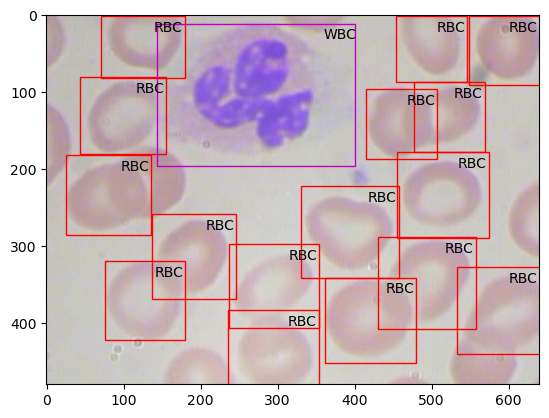

In [5]:
root = os.getcwd()
data = BCCD_Dataset(f'{root}/BCCD_Dataset/BCCD/JPEGImages', f'{root}/BCCD_Dataset/BCCD/Annotations')
img_eg, box_eg = data[145]

In [6]:
dataset = data.dataset
print(dataset.shape)
n, h, w, c = dataset.shape[0], dataset.shape[1], dataset.shape[2], dataset.shape[3]

torch.Size([364, 480, 640, 3])


In [89]:

def get_txt_annotations(pth, idx=None, write_pth=None):
    keys = {'RBC': 0, 'WBC': 1, 'Platelets': 2}
    iw, ih = 640, 480

    def create_box_obj(index):
        template_strand = os.listdir(pth)[0][:-7]
        obj_pth = pth + '/' + template_strand + str(index).zfill(3) + '.xml'

        with open(obj_pth, 'r') as file:
            data = file.read()
            xml_data = BeautifulSoup(data, "xml")
            a = xml_data.find_all('object')

        gp = lambda param: [i.find_all(param)[0].get_text() for i in a]
        x_min, y_min, x_max, y_max, name = gp('xmin'), gp('ymin'), gp('xmax'), gp('ymax'), gp('name')
        id_contig = [{'name': name[idx], 'xmin': int(x_min[idx]), 'ymin': int(y_min[idx]), 'xmax': int(x_max[idx]), 'ymax': int(y_max[idx])} for idx in range(len(a))]
        return obj_pth, id_contig
    
    if write_pth:
        for point in os.listdir(pth):
            point = point.split('/')[-1]
            pidx = int(point[-7:-4])
            _, data = create_box_obj(index = pidx)
            txt_pth = point.replace('xml', 'txt')
            # print(txt_pth)
            with open(write_pth+'/'+txt_pth, 'w') as file:
                for box in data:
                    width, height = box['xmax']-box['xmin'], box['ymax']-box['ymin']
                    file.write(f"{keys[box['name']]} {box['xmin']/iw} {box['ymin']/ih} {width/iw} {height/ih}\n")            
    else:   
        return create_box_obj(idx)

In [90]:
## RUN ONCE
get_txt_annotations('BCCD_Dataset/BCCD/Annotations', write_pth='BCCD_Dataset/BCCD/YoloCoordinates')

BloodImage_00315.txt
BloodImage_00301.txt
BloodImage_00117.txt
BloodImage_00103.txt
BloodImage_00088.txt
BloodImage_00063.txt
BloodImage_00077.txt
BloodImage_00261.txt
BloodImage_00275.txt
BloodImage_00249.txt
BloodImage_00248.txt
BloodImage_00274.txt
BloodImage_00260.txt
BloodImage_00076.txt
BloodImage_00062.txt
BloodImage_00089.txt
BloodImage_00300.txt
BloodImage_00314.txt
BloodImage_00302.txt
BloodImage_00100.txt
BloodImage_00114.txt
BloodImage_00074.txt
BloodImage_00048.txt
BloodImage_00289.txt
BloodImage_00276.txt
BloodImage_00262.txt
BloodImage_00263.txt
BloodImage_00277.txt
BloodImage_00288.txt
BloodImage_00049.txt
BloodImage_00075.txt
BloodImage_00115.txt
BloodImage_00101.txt
BloodImage_00317.txt
BloodImage_00303.txt
BloodImage_00307.txt
BloodImage_00313.txt
BloodImage_00139.txt
BloodImage_00111.txt
BloodImage_00059.txt
BloodImage_00071.txt
BloodImage_00065.txt
BloodImage_00298.txt
BloodImage_00273.txt
BloodImage_00267.txt
BloodImage_00266.txt
BloodImage_00272.txt
BloodImage_00